In [2]:
# Python
import os
import pandas as pd
from prophet import Prophet
from matplotlib.backends.backend_pdf import PdfPages

os.chdir(os.path.expanduser("/Users/ericarmstrong/Desktop"))

df = pd.read_csv("econ_data.csv")
df.head()

df.rename(columns={"date": "ds", "data": "y"}, inplace=True)
# Convert date column to datetime format if needed
df["ds"] = pd.to_datetime(df["ds"])
subdfs = {name: group for name, group in df.groupby('seriesName')}

/var/folders/6z/wlktd8gj4hx4g0wlfsw0w9g00000gp/T/ipykernel_1694/4137029389.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ds"] = pd.to_datetime(df["ds"])


11:10:36 - cmdstanpy - INFO - Chain [1] start processing
11:10:36 - cmdstanpy - INFO - Chain [1] done processing


            ds
760 2026-03-28
761 2026-03-29
762 2026-03-30
763 2026-03-31
764 2026-04-01
            ds           yhat     yhat_lower     yhat_upper
760 2026-03-28  110670.500184  105218.758042  116638.174630
761 2026-03-29  110424.558717  104255.441258  116114.064489
762 2026-03-30  110072.797613  104661.129608  115854.432554
763 2026-03-31  109613.094723  103744.949669  115340.227305
764 2026-04-01  109046.762481  103172.064869  115232.699584


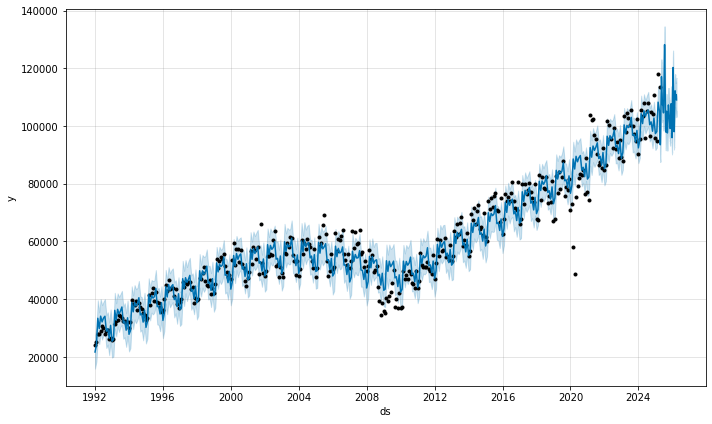

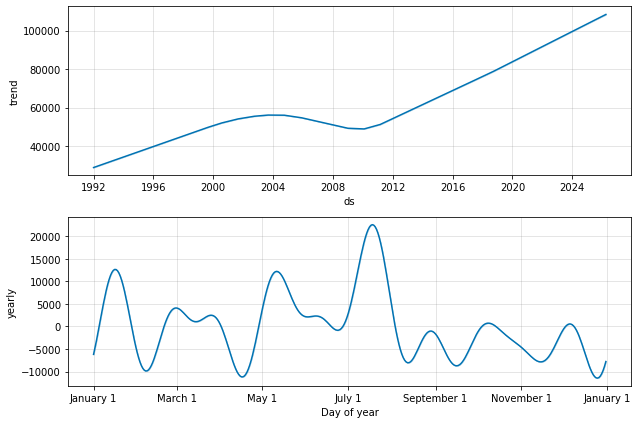

In [3]:
m1 = Prophet()
m1.fit(subdfs["NRSI111N"])

future1 = m1.make_future_dataframe(periods=365)
print(future1.tail())

forecast1 = m1.predict(future1)
print(forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

fig1 = m1.plot(forecast1)
fig2 = m1.plot_components(forecast1)

11:10:37 - cmdstanpy - INFO - Chain [1] start processing
11:10:37 - cmdstanpy - INFO - Chain [1] done processing


            ds
652 2026-03-28
653 2026-03-29
654 2026-03-30
655 2026-03-31
656 2026-04-01
            ds          yhat    yhat_lower    yhat_upper
652 2026-03-28  79843.780527  78220.233254  81268.928486
653 2026-03-29  78929.167015  77382.644900  80387.575386
654 2026-03-30  78066.789994  76546.646641  79498.467795
655 2026-03-31  77265.585936  75823.180694  78890.488673
656 2026-04-01  76532.838960  75054.902068  78046.923567


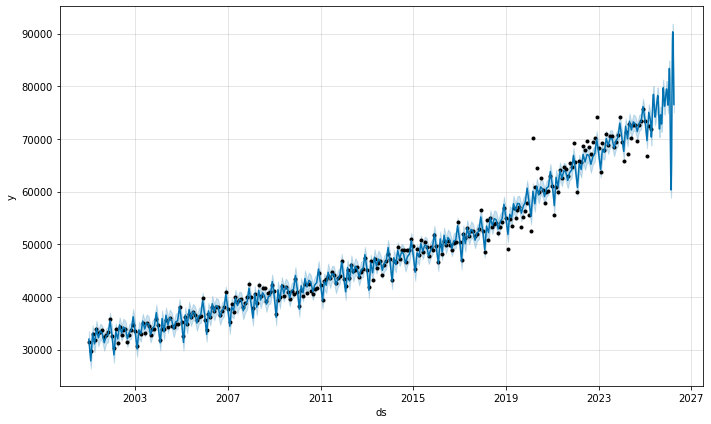

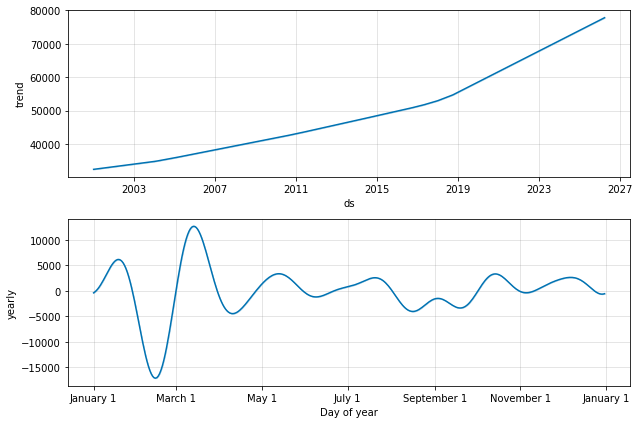

In [4]:
m2 = Prophet()
m2.fit(subdfs["NRSI511N"])

future2 = m2.make_future_dataframe(periods=365)
print(future2.tail())

forecast2 = m2.predict(future2)
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

fig3 = m2.plot(forecast2)
fig4 = m2.plot_components(forecast2)

In [5]:
subdfs["CCIN"]
print(subdfs["CCIN"]["ds"].min())
print(subdfs["CCIN"]["ds"].max())
subdfs["CCIN"] = subdfs["CCIN"][subdfs["CCIN"]["ds"].dt.year >= 1975]

1975-01-01 00:00:00
2074-12-01 00:00:00


11:10:38 - cmdstanpy - INFO - Chain [1] start processing
11:10:38 - cmdstanpy - INFO - Chain [1] done processing


          ds
0 2025-06-02
1 2025-06-03
2 2025-06-04
3 2025-06-05
4 2025-06-06
            ds
360 2026-05-28
361 2026-05-29
362 2026-05-30
363 2026-05-31
364 2026-06-01
            ds        yhat  yhat_lower  yhat_upper
360 2026-05-28  116.442431   89.863457  142.564508
361 2026-05-29  116.873764   89.715003  143.940372
362 2026-05-30  117.267851   88.720160  144.386206
363 2026-05-31  117.621127   91.960281  143.127198
364 2026-06-01  117.931511   92.135863  144.160721


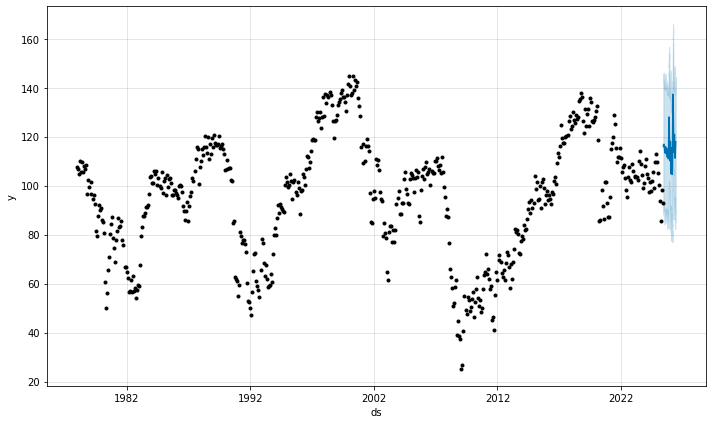

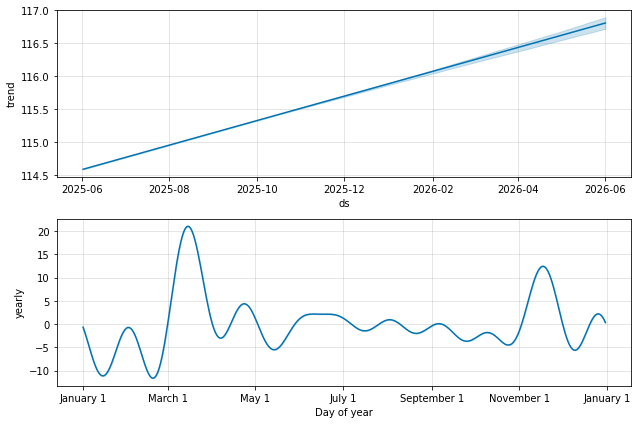

In [6]:
newdata = subdfs["CCIN"][
    (subdfs["CCIN"]["ds"].dt.year >= 1978) &
    (subdfs["CCIN"]["ds"].dt.year <= 2025)
]

m3 = Prophet()
m3.fit(newdata)

future3 = m3.make_future_dataframe(periods=365, include_history=False)
print(future3.head())
print(future3.tail())

forecast3 = m3.predict(future3)
print(forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

fig5 = m3.plot(forecast3)
fig6 = m3.plot_components(forecast3)

In [7]:
output_path = os.path.expanduser("/Users/ericarmstrong/Desktop/prophet_forecast.pdf")

# Save both plots to a single PDF
with PdfPages(output_path) as pdf:
    pdf.savefig(fig1)  # forecast plot (cars)
    pdf.savefig(fig2)  # components plot (cars)
    pdf.savefig(fig3)  # forecast plot (groceries)
    pdf.savefig(fig4)  # components plot (groceries)
    pdf.savefig(fig5)  # forecast plot (consumer confidence)
    pdf.savefig(fig6)  # components plot (consumer confidence)

print(f"PDF saved to: {output_path}")

PDF saved to: /Users/ericarmstrong/Desktop/prophet_forecast.pdf


In [43]:
import pandas as pd
import statsmodels.formula.api as smf

# Load and prep
df2 = pd.read_csv("econ_data v2.csv")
df2['date'] = pd.to_datetime(df2['date'])

# Inspect unique series names
print("Unique series names:", df2['seriesName'].unique())

# Pivot
df_wide = df2.pivot(index='date', columns='seriesName', values='data')

# Check available columns BEFORE dropping anything
print("\nPivoted columns:", df_wide.columns.tolist())

# Only drop rows with NaNs
df_wide = df_wide.dropna(axis=0)  # Keep all columns

# Reset index and compute pct_change
df_wide = df_wide.reset_index()
df_wide.iloc[:, 1:] = df_wide.iloc[:, 1:].pct_change(periods=4)
df_wide = df_wide.dropna()

# Confirm if needed columns exist now
required = ['NRSI511N', 'GDPA', 'YPA']
missing = [col for col in required if col not in df_wide.columns]
if missing:
    raise ValueError(f"❌ These columns are missing: {missing}")

# Check for NaNs in target + predictors
print("\nNaNs in required columns:\n", df_wide[required].isna().sum())

# Build and fit model
formula = "NRSI511N ~ GDPA + YPA"
model1 = smf.ols(formula, data=df_wide).fit()
print(model1.summary())

Unique series names: ['NRSI111N' 'NRSI511N' 'NRSV2N' 'CCIN' 'CCOND' 'VSMIDN' 'VSMINN' 'GDPA'
 'YPA' 'RECPROB' 'CPIUANN' 'PMEA' 'PXEA']

Pivoted columns: ['CCIN', 'CCOND', 'CPIUANN', 'GDPA', 'NRSI111N', 'NRSI511N', 'NRSV2N', 'PMEA', 'PXEA', 'RECPROB', 'VSMIDN', 'VSMINN', 'YPA']

NaNs in required columns:
 seriesName
NRSI511N    0
GDPA        0
YPA         0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:               NRSI511N   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     27.85
Date:                Wed, 09 Jul 2025   Prob (F-statistic):            0.00449
Time:                        13:11:54   Log-Likelihood:                 18.793
No. Observations:                   7   AIC:                            -31.59
Df Residuals:                       4   BIC:                            -31

/Users/ericarmstrong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


13:22:17 - cmdstanpy - INFO - Chain [1] start processing
13:22:17 - cmdstanpy - INFO - Chain [1] done processing


Fitting 3 folds for each of 18 candidates, totalling 54 fits


13:22:17 - cmdstanpy - INFO - Chain [1] start processing
13:22:17 - cmdstanpy - INFO - Chain [1] done processing
13:22:17 - cmdstanpy - INFO - Chain [1] start processing
13:22:17 - cmdstanpy - INFO - Chain [1] done processing
13:22:17 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.2s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.1s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.1s


13:22:18 - cmdstanpy - INFO - Chain [1] done processing
13:22:18 - cmdstanpy - INFO - Chain [1] start processing
13:22:18 - cmdstanpy - INFO - Chain [1] done processing
13:22:18 - cmdstanpy - INFO - Chain [1] start processing
13:22:18 - cmdstanpy - INFO - Chain [1] done processing
13:22:18 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.3s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.1s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.1s


13:22:18 - cmdstanpy - INFO - Chain [1] done processing
13:22:18 - cmdstanpy - INFO - Chain [1] start processing
13:22:18 - cmdstanpy - INFO - Chain [1] done processing
13:22:18 - cmdstanpy - INFO - Chain [1] start processing
13:22:18 - cmdstanpy - INFO - Chain [1] done processing
13:22:18 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.3s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.1s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.1s


13:22:18 - cmdstanpy - INFO - Chain [1] done processing
13:22:18 - cmdstanpy - INFO - Chain [1] start processing
13:22:18 - cmdstanpy - INFO - Chain [1] done processing
13:22:19 - cmdstanpy - INFO - Chain [1] start processing
13:22:19 - cmdstanpy - INFO - Chain [1] done processing
13:22:19 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   0.2s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   0.1s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   0.1s


13:22:19 - cmdstanpy - INFO - Chain [1] done processing
13:22:19 - cmdstanpy - INFO - Chain [1] start processing
13:22:19 - cmdstanpy - INFO - Chain [1] done processing
13:22:19 - cmdstanpy - INFO - Chain [1] start processing
13:22:19 - cmdstanpy - INFO - Chain [1] done processing
13:22:19 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   0.2s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   0.1s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   0.1s


13:22:19 - cmdstanpy - INFO - Chain [1] done processing
13:22:19 - cmdstanpy - INFO - Chain [1] start processing
13:22:19 - cmdstanpy - INFO - Chain [1] done processing
13:22:19 - cmdstanpy - INFO - Chain [1] start processing
13:22:19 - cmdstanpy - INFO - Chain [1] done processing
13:22:19 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   0.2s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   0.1s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   0.1s


13:22:20 - cmdstanpy - INFO - Chain [1] done processing
13:22:20 - cmdstanpy - INFO - Chain [1] start processing
13:22:20 - cmdstanpy - INFO - Chain [1] done processing
13:22:20 - cmdstanpy - INFO - Chain [1] start processing
13:22:20 - cmdstanpy - INFO - Chain [1] done processing
13:22:20 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.3s
[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.1s
[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.1s


13:22:20 - cmdstanpy - INFO - Chain [1] done processing
13:22:20 - cmdstanpy - INFO - Chain [1] start processing
13:22:20 - cmdstanpy - INFO - Chain [1] done processing
13:22:20 - cmdstanpy - INFO - Chain [1] start processing
13:22:20 - cmdstanpy - INFO - Chain [1] done processing
13:22:20 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.3s
[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.1s
[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.1s


13:22:21 - cmdstanpy - INFO - Chain [1] done processing
13:22:21 - cmdstanpy - INFO - Chain [1] start processing
13:22:21 - cmdstanpy - INFO - Chain [1] done processing
13:22:21 - cmdstanpy - INFO - Chain [1] start processing
13:22:21 - cmdstanpy - INFO - Chain [1] done processing
13:22:21 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.3s
[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.1s
[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.1s


13:22:21 - cmdstanpy - INFO - Chain [1] done processing
13:22:21 - cmdstanpy - INFO - Chain [1] start processing
13:22:21 - cmdstanpy - INFO - Chain [1] done processing
13:22:21 - cmdstanpy - INFO - Chain [1] start processing
13:22:21 - cmdstanpy - INFO - Chain [1] done processing
13:22:21 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   0.3s
[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   0.1s
[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   0.1s


13:22:22 - cmdstanpy - INFO - Chain [1] done processing
13:22:22 - cmdstanpy - INFO - Chain [1] start processing
13:22:22 - cmdstanpy - INFO - Chain [1] done processing
13:22:22 - cmdstanpy - INFO - Chain [1] start processing
13:22:22 - cmdstanpy - INFO - Chain [1] done processing
13:22:22 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   0.3s
[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   0.1s
[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   0.1s


13:22:22 - cmdstanpy - INFO - Chain [1] done processing
13:22:22 - cmdstanpy - INFO - Chain [1] start processing
13:22:22 - cmdstanpy - INFO - Chain [1] done processing
13:22:22 - cmdstanpy - INFO - Chain [1] start processing
13:22:22 - cmdstanpy - INFO - Chain [1] done processing
13:22:22 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   0.3s
[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   0.1s
[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   0.1s


13:22:22 - cmdstanpy - INFO - Chain [1] done processing
13:22:22 - cmdstanpy - INFO - Chain [1] start processing
13:22:22 - cmdstanpy - INFO - Chain [1] done processing
13:22:23 - cmdstanpy - INFO - Chain [1] start processing
13:22:23 - cmdstanpy - INFO - Chain [1] done processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.2s
[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.1s


13:22:23 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.1s


13:22:23 - cmdstanpy - INFO - Chain [1] done processing
13:22:23 - cmdstanpy - INFO - Chain [1] start processing
13:22:23 - cmdstanpy - INFO - Chain [1] done processing
13:22:23 - cmdstanpy - INFO - Chain [1] start processing
13:22:23 - cmdstanpy - INFO - Chain [1] done processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.2s
[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.1s


13:22:23 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.1s


13:22:23 - cmdstanpy - INFO - Chain [1] done processing
13:22:23 - cmdstanpy - INFO - Chain [1] start processing
13:22:23 - cmdstanpy - INFO - Chain [1] done processing
13:22:23 - cmdstanpy - INFO - Chain [1] start processing
13:22:24 - cmdstanpy - INFO - Chain [1] done processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.2s
[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.1s


13:22:24 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.1s


13:22:24 - cmdstanpy - INFO - Chain [1] done processing
13:22:24 - cmdstanpy - INFO - Chain [1] start processing
13:22:24 - cmdstanpy - INFO - Chain [1] done processing
13:22:24 - cmdstanpy - INFO - Chain [1] start processing
13:22:24 - cmdstanpy - INFO - Chain [1] done processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   0.2s
[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   0.1s


13:22:24 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   0.1s


13:22:24 - cmdstanpy - INFO - Chain [1] done processing
13:22:24 - cmdstanpy - INFO - Chain [1] start processing
13:22:24 - cmdstanpy - INFO - Chain [1] done processing
13:22:24 - cmdstanpy - INFO - Chain [1] start processing
13:22:24 - cmdstanpy - INFO - Chain [1] done processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   0.2s
[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   0.1s


13:22:25 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   0.1s


13:22:25 - cmdstanpy - INFO - Chain [1] done processing
13:22:25 - cmdstanpy - INFO - Chain [1] start processing
13:22:25 - cmdstanpy - INFO - Chain [1] done processing
13:22:25 - cmdstanpy - INFO - Chain [1] start processing
13:22:25 - cmdstanpy - INFO - Chain [1] done processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   0.3s
[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   0.1s


13:22:25 - cmdstanpy - INFO - Chain [1] start processing
13:22:25 - cmdstanpy - INFO - Chain [1] done processing
13:22:25 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   0.1s
Best params: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best score (neg MSE): -17044792.69896373


13:22:25 - cmdstanpy - INFO - Chain [1] done processing


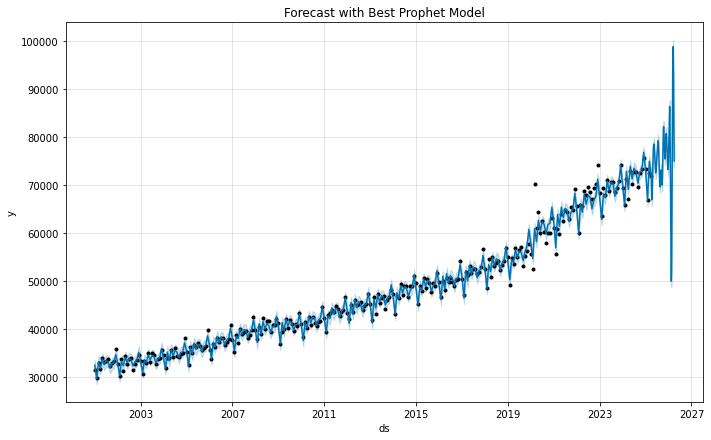

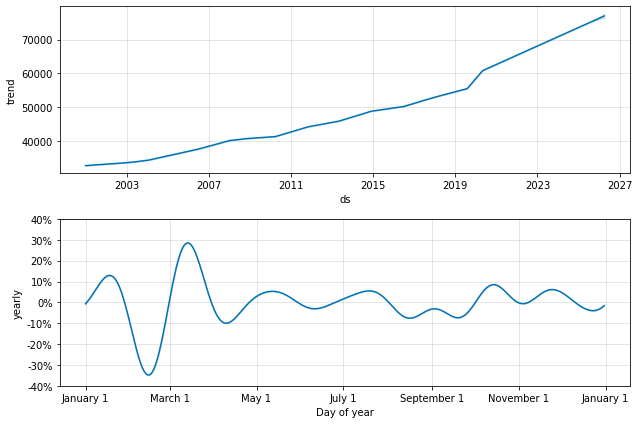

In [45]:
# Grid Search and Time Series Tuning
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.base import BaseEstimator, RegressorMixin
import matplotlib.pyplot as plt

# --- 1. Prep: Select just the NRSI511N data and rename columns ---
df_prophet = df2[df2['seriesName'] == 'NRSI511N'].copy()
df_prophet = df_prophet.rename(columns={'date': 'ds', 'data': 'y'})
df_prophet = df_prophet[['ds', 'y']].dropna().sort_values('ds').reset_index(drop=True)

# --- 2. Prophet sklearn-compatible wrapper ---
from sklearn.metrics import make_scorer, mean_squared_error

# Updated ProphetWrapper
class ProphetWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, changepoint_prior_scale=0.05, seasonality_prior_scale=10.0, seasonality_mode='additive'):
        self.changepoint_prior_scale = changepoint_prior_scale
        self.seasonality_prior_scale = seasonality_prior_scale
        self.seasonality_mode = seasonality_mode
        self.model = None

    def fit(self, X, y):
        df = X.copy()
        df['y'] = y.values
        self.model = Prophet(
            changepoint_prior_scale=self.changepoint_prior_scale,
            seasonality_prior_scale=self.seasonality_prior_scale,
            seasonality_mode=self.seasonality_mode
        )
        self.model.fit(df)
        return self

    def predict(self, X):
        forecast = self.model.predict(X)
        return forecast['yhat'].values

# --- Prepare df_prophet again ---
df_prophet = df2[df2['seriesName'] == 'NRSI511N'].copy()
df_prophet = df_prophet.rename(columns={'date': 'ds', 'data': 'y'})
df_prophet = df_prophet[['ds', 'y']].dropna().sort_values('ds').reset_index(drop=True)

# --- Define X, y ---
X = df_prophet[['ds']]
y = df_prophet['y']

# --- Custom scoring function ---
def prophet_mse(estimator, X_val, y_val):
    y_pred = estimator.predict(X_val)
    return -mean_squared_error(y_val, y_pred)  # negative because GridSearchCV maximizes

# --- Grid search setup ---
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [1.0, 5.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

tscv = TimeSeriesSplit(n_splits=3)
grid = GridSearchCV(
    estimator=ProphetWrapper(),
    param_grid=param_grid,
    scoring=prophet_mse,
    cv=tscv,
    verbose=2
)

# --- Run grid search ---
grid.fit(X, y)

# --- Best result ---
print("Best params:", grid.best_params_)
print("Best score (neg MSE):", grid.best_score_)

best_params = grid.best_params_
best_prophet = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    seasonality_mode=best_params['seasonality_mode']
)
best_prophet.fit(df_prophet)

# --- 2. Make future dataframe & predict ---
future = best_prophet.make_future_dataframe(periods=365, freq='D')  # adjust `freq` if not daily
forecast = best_prophet.predict(future)

# --- 3. Plot forecast ---
fig1 = best_prophet.plot(forecast)
plt.title("Forecast with Best Prophet Model")
plt.show()

# --- 4. Plot forecast components (trend/seasonality) ---
fig2 = best_prophet.plot_components(forecast)
plt.show()

In [46]:
# --- Prepare df_prophet again ---
df_prophet = df2[df2['seriesName'] == 'GDPA'].copy()
df_prophet = df_prophet.rename(columns={'date': 'ds', 'data': 'y'})
df_prophet = df_prophet[['ds', 'y']].dropna().sort_values('ds').reset_index(drop=True)

# --- Define X, y ---
X = df_prophet[['ds']]
y = df_prophet['y']

# --- Custom scoring function ---
def prophet_mse(estimator, X_val, y_val):
    y_pred = estimator.predict(X_val)
    return -mean_squared_error(y_val, y_pred)  # negative because GridSearchCV maximizes

# --- Grid search setup ---
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [1.0, 5.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

tscv = TimeSeriesSplit(n_splits=3)
grid = GridSearchCV(
    estimator=ProphetWrapper(),
    param_grid=param_grid,
    scoring=prophet_mse,
    cv=tscv,
    verbose=2
)

# --- Run grid search ---
grid.fit(X, y)

# --- Best result ---
print("Best params:", grid.best_params_)
print("Best score (neg MSE):", grid.best_score_)

# --- 6. Plot ---
fig1 = best_model.model.plot(forecast)
fig2 = best_model.model.plot_components(forecast)
plt.show()

13:22:46 - cmdstanpy - INFO - Chain [1] start processing
13:22:46 - cmdstanpy - INFO - Chain [1] done processing
13:22:46 - cmdstanpy - INFO - Chain [1] start processing


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.1s


13:22:46 - cmdstanpy - INFO - Chain [1] done processing
13:22:46 - cmdstanpy - INFO - Chain [1] start processing
13:22:46 - cmdstanpy - INFO - Chain [1] done processing
13:22:46 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.1s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.2s


13:22:46 - cmdstanpy - INFO - Chain [1] done processing
13:22:46 - cmdstanpy - INFO - Chain [1] start processing
13:22:46 - cmdstanpy - INFO - Chain [1] done processing
13:22:46 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.1s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.1s


13:22:47 - cmdstanpy - INFO - Chain [1] done processing
13:22:47 - cmdstanpy - INFO - Chain [1] start processing
13:22:47 - cmdstanpy - INFO - Chain [1] done processing
13:22:47 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.2s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.1s


13:22:47 - cmdstanpy - INFO - Chain [1] done processing
13:22:47 - cmdstanpy - INFO - Chain [1] start processing
13:22:47 - cmdstanpy - INFO - Chain [1] done processing


[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.2s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.2s


13:22:47 - cmdstanpy - INFO - Chain [1] start processing
13:22:47 - cmdstanpy - INFO - Chain [1] done processing
13:22:47 - cmdstanpy - INFO - Chain [1] start processing
13:22:47 - cmdstanpy - INFO - Chain [1] done processing
13:22:47 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   0.1s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   0.1s


13:22:47 - cmdstanpy - INFO - Chain [1] done processing
13:22:47 - cmdstanpy - INFO - Chain [1] start processing
13:22:48 - cmdstanpy - INFO - Chain [1] done processing
13:22:48 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   0.2s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   0.1s


13:22:48 - cmdstanpy - INFO - Chain [1] done processing
13:22:48 - cmdstanpy - INFO - Chain [1] start processing
13:22:48 - cmdstanpy - INFO - Chain [1] done processing
13:22:48 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   0.2s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   0.2s


13:22:48 - cmdstanpy - INFO - Chain [1] done processing
13:22:48 - cmdstanpy - INFO - Chain [1] start processing
13:22:48 - cmdstanpy - INFO - Chain [1] done processing
13:22:48 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   0.1s
[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   0.2s


13:22:48 - cmdstanpy - INFO - Chain [1] done processing
13:22:48 - cmdstanpy - INFO - Chain [1] start processing
13:22:49 - cmdstanpy - INFO - Chain [1] done processing
13:22:49 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.01, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   0.2s
[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.2s


13:22:49 - cmdstanpy - INFO - Chain [1] done processing
13:22:49 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.4s


13:22:49 - cmdstanpy - INFO - Chain [1] done processing
13:22:49 - cmdstanpy - INFO - Chain [1] start processing
13:22:49 - cmdstanpy - INFO - Chain [1] done processing
13:22:49 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.4s
[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.1s


13:22:50 - cmdstanpy - INFO - Chain [1] done processing
13:22:50 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.4s


13:22:50 - cmdstanpy - INFO - Chain [1] done processing
13:22:50 - cmdstanpy - INFO - Chain [1] start processing
13:22:50 - cmdstanpy - INFO - Chain [1] done processing
13:22:50 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.4s
[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.1s


13:22:51 - cmdstanpy - INFO - Chain [1] done processing
13:22:51 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.4s


13:22:51 - cmdstanpy - INFO - Chain [1] done processing
13:22:51 - cmdstanpy - INFO - Chain [1] start processing
13:22:51 - cmdstanpy - INFO - Chain [1] done processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.5s


13:22:51 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   0.2s


13:22:52 - cmdstanpy - INFO - Chain [1] done processing
13:22:52 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   0.7s


13:22:53 - cmdstanpy - INFO - Chain [1] done processing
13:22:53 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   0.8s


13:22:53 - cmdstanpy - INFO - Chain [1] done processing
13:22:53 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   0.3s


13:22:54 - cmdstanpy - INFO - Chain [1] done processing
13:22:54 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   0.5s


13:22:55 - cmdstanpy - INFO - Chain [1] done processing
13:22:55 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   1.0s


13:22:55 - cmdstanpy - INFO - Chain [1] done processing
13:22:55 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   0.3s


13:22:56 - cmdstanpy - INFO - Chain [1] done processing
13:22:56 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   0.6s


13:22:57 - cmdstanpy - INFO - Chain [1] done processing
13:22:57 - cmdstanpy - INFO - Chain [1] start processing
13:22:57 - cmdstanpy - INFO - Chain [1] done processing


[CV] END changepoint_prior_scale=0.1, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   1.1s


13:22:57 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.2s


13:22:57 - cmdstanpy - INFO - Chain [1] done processing
13:22:57 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.4s


13:22:58 - cmdstanpy - INFO - Chain [1] done processing
13:22:58 - cmdstanpy - INFO - Chain [1] start processing
13:22:58 - cmdstanpy - INFO - Chain [1] done processing
13:22:58 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=1.0; total time=   0.5s
[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.2s


13:22:58 - cmdstanpy - INFO - Chain [1] done processing
13:22:58 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.3s


13:22:59 - cmdstanpy - INFO - Chain [1] done processing
13:22:59 - cmdstanpy - INFO - Chain [1] start processing
13:22:59 - cmdstanpy - INFO - Chain [1] done processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=5.0; total time=   0.5s


13:22:59 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.2s


13:22:59 - cmdstanpy - INFO - Chain [1] done processing
13:22:59 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.3s


13:23:00 - cmdstanpy - INFO - Chain [1] done processing
13:23:00 - cmdstanpy - INFO - Chain [1] start processing
13:23:00 - cmdstanpy - INFO - Chain [1] done processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=additive, seasonality_prior_scale=10.0; total time=   0.5s


13:23:00 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   0.2s


13:23:00 - cmdstanpy - INFO - Chain [1] done processing
13:23:00 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   0.6s


13:23:02 - cmdstanpy - INFO - Chain [1] done processing
13:23:02 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=1.0; total time=   1.3s


13:23:02 - cmdstanpy - INFO - Chain [1] done processing
13:23:02 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   0.3s


13:23:03 - cmdstanpy - INFO - Chain [1] done processing
13:23:03 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   0.6s


13:23:04 - cmdstanpy - INFO - Chain [1] done processing
13:23:04 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=5.0; total time=   1.1s


13:23:04 - cmdstanpy - INFO - Chain [1] done processing
13:23:04 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   0.3s


13:23:05 - cmdstanpy - INFO - Chain [1] done processing
13:23:05 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   0.7s


13:23:06 - cmdstanpy - INFO - Chain [1] done processing
13:23:06 - cmdstanpy - INFO - Chain [1] start processing


[CV] END changepoint_prior_scale=0.5, seasonality_mode=multiplicative, seasonality_prior_scale=10.0; total time=   1.3s


13:23:07 - cmdstanpy - INFO - Chain [1] done processing


Best params: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}
Best score (neg MSE): -8835532.494376635


NameError: name 'best_model' is not defined